# 17-07 센텐스버트(Sentence BERT, SBERT)
BERT로부터 문장 임베딩을 얻을 수 있는 센텐스버트(Sentence BERT, SBERT)에 대해서 다룹니다.

## 1.BERT의 문장 임베딩
BERT로부터 문장 벡터를 얻는 방법은 여러가지 방법이 존재하지만 여기서는 총 세 가지에 대해서 언급하겠습니다. 만약 사전 학습된 BERT에 'I love you'라는 문장이 입력된다고 하였을 때, 이 문장에 대한 벡터를 얻는 첫번째 방법은 [CLS] 토큰의 출력 벡터를 문장 벡터로 간주하는 것입니다.

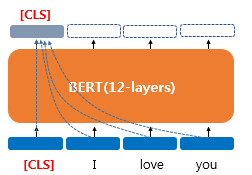

앞서 BERT로 텍스트 분류 문제를 풀 때, [CLS] 토큰의 출력 벡터를 출력층의 입력으로 사용했던 점을 상기해봅시다. 이는 [CLS] 토큰이 입력된 문장에 대한 총체적 표현이라고 간주하고 있기 때문입니다. 다시 말해 [CLS] 토큰 자체를 입력 문장의 벡터로 간주할 수 있습니다.

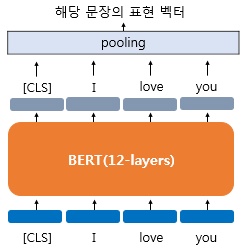

문장 벡터를 얻는 두번째 방법은 [CLS] 토큰만을 사용하는 것이 아니라 BERT의 모든 출력 벡터들을 평균내는 것입니다. 앞서 9챕터에서 단어 벡터들의 평균을 문장 벡터로 간주할 수 있다고 설명한 바 있습니다. 이는 BERT에서도 적용되는데, BERT의 각 단어에 대한 출력 벡터들에 대해서 평균을 내고 이를 문장 벡터로 볼 수 있습니다. 위 그림에서는 출력 벡터들의 평균을 'pooling'이라고 표현했습니다. 이를 평균 풀링(mean pooling)을 하였다고 표현하기도 합니다. 그런데 풀링에는 평균 풀링만 있는 것이 아니라 11챕터의 합성곱 신경망을 다룰 때 설명했던 맥스 풀링(max pooling) 또한 존재합니다. 세번째 방법은 BERT의 각 단어의 출력 벡터들에 대해서 평균 풀링 대신 맥스 풀링을 진행한 벡터를 얻는 것입니다.

정리하면 사전 학습된 BERT로부터 문장 벡터를 얻는 방법은 다음과 같이 세 가지가 있습니다.

* BERT의 [CLS] 토큰의 출력 벡터를 문장 벡터로 간주한다.
* BERT의 모든 단어의 출력 벡터에 대해서 평균 풀링을 수행한 벡터를 문장 벡터로 간주한다.
* BERT의 모든 단어의 출력 벡터에 대해서 맥스 풀링을 수행한 벡터를 문장 벡터로 간주한다.  
  
이때 평균 풀링을 하느냐와 맥스 풀링을 하느냐에 따라서 해당 문장 벡터가 가지는 의미는 다소 다른데, 평균 풀링을 얻은 문장 벡터의 경우에는 모든 단어의 의미를 반영하는 쪽에 가깝다면, 맥스 풀링을 얻은 문장 벡터의 경우에는 중요한 단어의 의미를 반영하는 쪽에 가깝습니다.

## 2.SBERT(센텐스버트, Sentence-BERT)
SBERT는 기본적으로 BERT의 문장 임베딩의 성능을 우수하게 개선시킨 모델입니다. SBERT는 위에서 언급한 BERT의 문장 임베딩을 응용하여 BERT를 파인 튜닝합니다. SBERT가 어떤 식으로 학습되는지 정리해봅시다.

### 1) 문장 쌍 분류 태스크로 파인 튜닝
SBERT를 학습하는 첫번째 방법은 문장 쌍 분류 태스크. 대표적으로는 NLI(Natural Language Inferencing) 문제를 푸는 것입니다. 다음 챕터에서 한국어 버전의 NLI 데이터인 KorNLI 문제를 BERT로 풀어볼 예정입니다. NLI는 두 개의 문장이 주어지면 수반(entailment) 관계인지, 모순(contradiction) 관계인지, 중립(neutral) 관계인지를 맞추는 문제입니다. 다음은 NLI 데이터의 예시입니다.

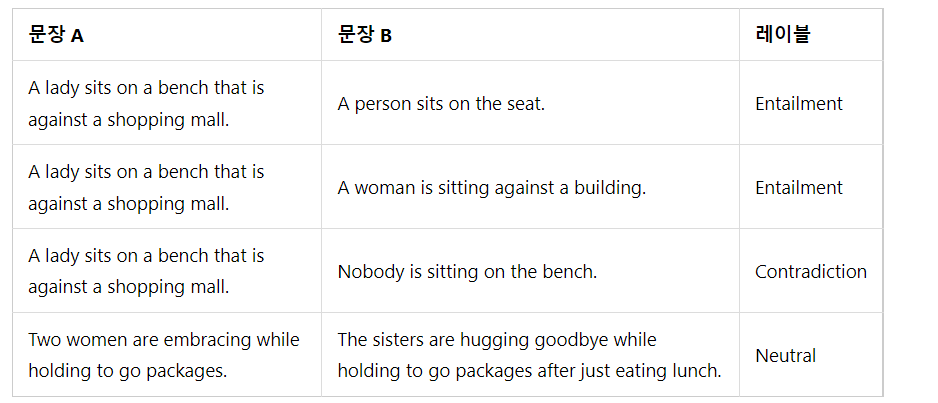

SBERT는 NLI 데이터를 학습하기 위해 다음과 같은 구조를 가집니다.  
  
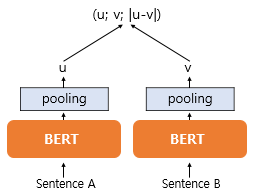

우선 문장 A와 문장 B 각각을 BERT의 입력으로 넣고, 앞서 BERT의 문장 임베딩을 얻기위한 방식이라고 언급했던 평균 풀링 또는 맥스 풀링을 통해서 각각에 대한 문장 임베딩 벡터를 얻습니다. 여기서는 이를 각각 u와 v라고 합시다. 그리고 나서 u벡터와 v벡터의 차이 벡터를 구합니다. 이 벡터는 수식으로 표현하면 |u-v|입니다. 그리고 이 세 가지 벡터를 연결(concatenation)합니다. 세미콜론(;)을 연결 기호로 한다면 연결된 벡터의 수식은 다음과 같습니다.  
  
$h = (u; v; |u-v|)$
  
만약 BERT의 문장 임베딩 벡터의 차원이 $ㅜ$이라면 세 개의 벡터를 연결한 벡터 $h$의 차원은 $3n$이 됩니다.  
  
  
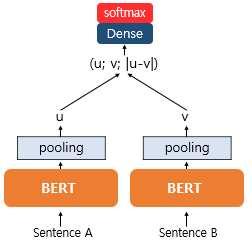

그리고 이 벡터를 출력층으로 보내 다중 클래스 분류 문제를 풀도록 합니다. 다시 말해 분류하고자 하는 클래스의 개수가 $k$라면, 가중치 행렬 $3n\ ×\ k$의 크기를 가지는 행렬 $W_y$을 곱한 후에 소프트맥스 함수를 통과시킨다고도 볼 수 있습니다. 식으로 표현하면 다음과 같습니다.  
  
$o = softmax(W_{y}h)$  
  
이제 실제값에 해당하는 레이블로부터 오차를 줄이는 방식으로 학습시킵니다.

### 2) 문장 쌍 회귀 태스크로 파인 튜닝  
  
SBERT를 학습하는 두번째 방법은 문장 쌍으로 회귀 문제를 푸는 것으로 대표적으로 STS(Semantic Textual Similarity) 문제를 푸는 경우입니다. STS란 두 개의 문장으로부터 의미적 유사성을 구하는 문제를 말합니다. 다음은 STS 데이터의 예시입니다. 여기서 레이블은 두 문장의 유사도로 범위값은 0~5입니다.

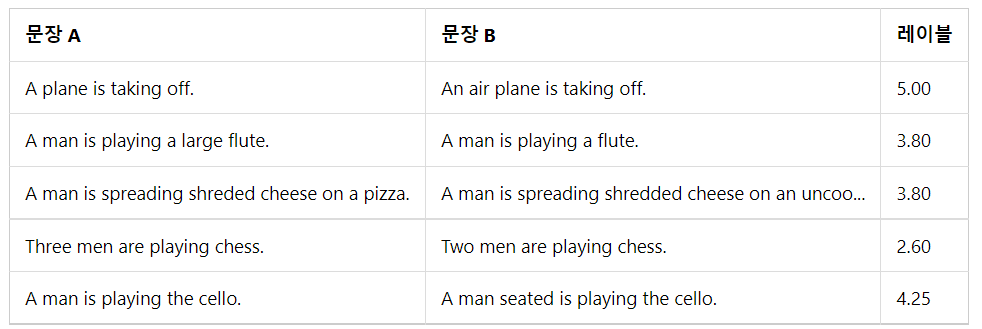

참고) 한국어 버전의 STS 데이터셋인 KorSTS 데이터셋도 있으므로 아래 링크를 참고하세요.
링크 : https://github.com/kakaobrain/KorNLUDatasets

SBERT는 STS 데이터를 학습하기 위해 다음과 같은 구조를 가집니다.  
  
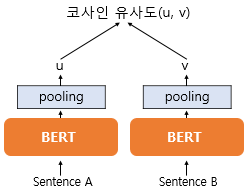

# 새 섹션

문장 A와 문장 B 각각을 BERT의 입력으로 넣고, 평균 풀링 또는 맥스 풀링을 통해서 각각에 대한 문장 임베딩 벡터를 얻습니다. 이를 각각 u와 v라고 하였을 때 이 두 벡터의 코사인 유사도를 구합니다. 그리고 해당 유사도와 레이블 유사도와의 평균 제곱 오차(Mean Squared Error, MSE)를 최소화하는 방식으로 학습합니다. 코사인 유사도의 값의 범위는 -1과 1사이므로 위 데이터와 같이 레이블 스코어의 범위가 0~5점이라면 학습 전 해당 레이블들의 값들을 5로 나누어 값의 범위를 줄인 후 학습할 수 있습니다.

선택에 따라서 1) 문장 쌍 분류 태스크로만 파인 튜닝 할 수도 있고, 2) 문장 쌍 회귀 태스크로만 파인 튜닝 할 수도 있으며 1)을 학습한 후에 2)를 학습하는 전략을 세울 수도 있습니다. 뒤에서 파인 튜닝된 SBERT를 이용하여 한국어 챗봇을 구현하는 실습을 진행해보겠습니다.